<a href="https://colab.research.google.com/github/mehedi832766/Main_static_code/blob/main/Main_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#pre-requisite

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!nvidia-smi

Mon Apr  3 20:19:56 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# pip install split-folders

In [ ]:
# import splitfolders

In [ ]:
# input_folder = '/content/drive/MyDrive/DATASets/Cropped_data'

In [ ]:
# splitfolders.ratio(input_folder, output="/content/drive/MyDrive/DATASets/crop_Split_data",
#                    seed=42,ratio=(.7,.2,.1))

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten

from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
import numpy as np
import pandas as pd
from glob import glob
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/DATASets/crop_Split_data/train'
valid_path = '/content/drive/MyDrive/DATASets/crop_Split_data/val'
test_path='/content/drive/MyDrive/DATASets/crop_Split_data/test'


In [ ]:
  # useful for getting number of output classes
folders = sorted(glob('/content/drive/MyDrive/DATASets/crop_Split_data/train/*'))

In [ ]:
folders

['/content/drive/MyDrive/DATASets/crop_Split_data/train/A',
 '/content/drive/MyDrive/DATASets/crop_Split_data/train/AA',
 '/content/drive/MyDrive/DATASets/crop_Split_data/train/BA',
 '/content/drive/MyDrive/DATASets/crop_Split_data/train/BHA',
 '/content/drive/MyDrive/DATASets/crop_Split_data/train/BI',
 '/content/drive/MyDrive/DATASets/crop_Split_data/train/CHA',
 '/content/drive/MyDrive/DATASets/crop_Split_data/train/DA',
 '/content/drive/MyDrive/DATASets/crop_Split_data/train/DHA',
 '/content/drive/MyDrive/DATASets/crop_Split_data/train/DHO',
 '/content/drive/MyDrive/DATASets/crop_Split_data/train/DO',
 '/content/drive/MyDrive/DATASets/crop_Split_data/train/E',
 '/content/drive/MyDrive/DATASets/crop_Split_data/train/GA',
 '/content/drive/MyDrive/DATASets/crop_Split_data/train/GHA',
 '/content/drive/MyDrive/DATASets/crop_Split_data/train/HA',
 '/content/drive/MyDrive/DATASets/crop_Split_data/train/JA',
 '/content/drive/MyDrive/DATASets/crop_Split_data/train/JHA',
 '/content/drive/MyD

In [ ]:
len(folders)

39

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2
                                   )

val_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1323 images belonging to 39 classes.


In [ ]:
len(training_set)

42

In [ ]:
val_set = val_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 367 images belonging to 39 classes.


In [ ]:
len(val_set)

12

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)


In [ ]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 222,
                                            class_mode = 'categorical')


Found 222 images belonging to 39 classes.


In [ ]:
images, labels = next(test_set)
print(images.shape)
print(labels.shape)
type(images)

(222, 224, 224, 3)
(222, 39)


numpy.ndarray

In [ ]:
lbl=np.argmax(labels,axis=1)

In [ ]:
def display_random_image(index):
    """
        Display a random image from the images array and its correspond label from the labels array.
    """
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + li[lbl[index]])
    plt.show()
    


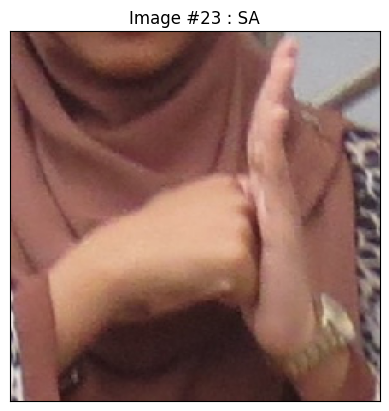

In [ ]:
display_random_image(23)

In [ ]:
len(images)

222

In [ ]:
images[0]

array([[[0.90196085, 0.86666673, 0.83921576],
        [0.8941177 , 0.8588236 , 0.8313726 ],
        [0.8980393 , 0.86274517, 0.8352942 ],
        ...,
        [0.7843138 , 0.77647066, 0.7254902 ],
        [0.7803922 , 0.7725491 , 0.72156864],
        [0.7843138 , 0.77647066, 0.7254902 ]],

       [[0.90196085, 0.86666673, 0.83921576],
        [0.8980393 , 0.86274517, 0.8352942 ],
        [0.8980393 , 0.86274517, 0.8352942 ],
        ...,
        [0.7803922 , 0.7725491 , 0.72156864],
        [0.77647066, 0.7686275 , 0.7176471 ],
        [0.7803922 , 0.7725491 , 0.72156864]],

       [[0.9058824 , 0.8705883 , 0.8431373 ],
        [0.9058824 , 0.8705883 , 0.8431373 ],
        [0.8980393 , 0.86274517, 0.8352942 ],
        ...,
        [0.7803922 , 0.7725491 , 0.72156864],
        [0.77647066, 0.7686275 , 0.7176471 ],
        [0.7843138 , 0.7686275 , 0.72156864]],

       ...,

       [[0.19607845, 0.20000002, 0.20784315],
        [0.23529413, 0.2392157 , 0.24705884],
        [0.20392159, 0

In [ ]:
class_dict = training_set.class_indices
print(class_dict)

{'A': 0, 'AA': 1, 'BA': 2, 'BHA': 3, 'BI': 4, 'CHA': 5, 'DA': 6, 'DHA': 7, 'DHO': 8, 'DO': 9, 'E': 10, 'GA': 11, 'GHA': 12, 'HA': 13, 'JA': 14, 'JHA': 15, 'KA': 16, 'KHA': 17, 'LA': 18, 'MA': 19, 'NA': 20, 'O': 21, 'PA': 22, 'PHA': 23, 'RA': 24, 'RHA': 25, 'SA': 26, 'SCHA': 27, 'TA': 28, 'THA': 29, 'THO': 30, 'TO': 31, 'U': 32, 'UN': 33, 'Y': 34, 'YA': 35, 'joint': 36, 'space': 37, 'stop': 38}


In [ ]:
li = list(class_dict.keys())
print(li)

['A', 'AA', 'BA', 'BHA', 'BI', 'CHA', 'DA', 'DHA', 'DHO', 'DO', 'E', 'GA', 'GHA', 'HA', 'JA', 'JHA', 'KA', 'KHA', 'LA', 'MA', 'NA', 'O', 'PA', 'PHA', 'RA', 'RHA', 'SA', 'SCHA', 'TA', 'THA', 'THO', 'TO', 'U', 'UN', 'Y', 'YA', 'joint', 'space', 'stop']


In [ ]:
len(li)

39

#**VGG16**

In [ ]:
# Import the VGG16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
# don't train existing weights
for layer in vgg16.layers:
    layer.trainable = False

In [ ]:
vx = Flatten()(vgg16.output)

In [ ]:
v_prediction = Dense(len(folders), activation='softmax')(vx)

# create a model object
v_model = Model(inputs=vgg16.input, outputs=v_prediction)

In [ ]:
# view the structure of the model
v_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
from keras import layers
for i, layer in enumerate(v_model.layers):
   print(i, layer.name)

0 input_1
1 block1_conv1
2 block1_conv2
3 block1_pool
4 block2_conv1
5 block2_conv2
6 block2_pool
7 block3_conv1
8 block3_conv2
9 block3_conv3
10 block3_pool
11 block4_conv1
12 block4_conv2
13 block4_conv3
14 block4_pool
15 block5_conv1
16 block5_conv2
17 block5_conv3
18 block5_pool
19 flatten
20 dense


In [ ]:
# tell the model what cost and optimization method to use
v_model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# checkpoint
from keras.callbacks import ModelCheckpoint,EarlyStopping,CSVLogger
# r_weightpath = "/content/drive/MyDrive/Thesis/weights/checkpoint/res_best_weights-{epoch:02d}-{val_accuracy:.2f}.hdf5"
v_weightpath = "/content/drive/MyDrive/PAPER/v16_best_weights_280223_sparse.hdf5"
checkpoint = ModelCheckpoint(v_weightpath, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=True, mode='max')
# checkpoint = ModelCheckpoint(r_weightpath, monitor='val_accuracy', verbose=1, save_best_only=True,  mode='max')

early_stop=EarlyStopping(monitor='val_accuracy',patience=15,verbose=1)

log_csv=CSVLogger('/content/drive/MyDrive/PAPER/v16_logs_280223_sparse.csv',separator=',',append=False)

callbacks_list = [checkpoint,log_csv,early_stop]

# fit the model
# Run the cell. It will take some time to execute
v = v_model.fit(
  training_set,
  validation_data=val_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(val_set),
  callbacks=callbacks_list
)

v_model.save('/content/drive/MyDrive/PAPER/model_vgg16_280223_sparse.h5')

Epoch 1/50
42/42 [==============================] - ETA: 0s - loss: 3.1553 - accuracy: 0.3091
Epoch 1: val_accuracy improved from -inf to 0.53406, saving model to /content/drive/MyDrive/PAPER/v16_best_weights_280223_sparse.hdf5
42/42 [==============================] - 39s 757ms/step - loss: 3.1553 - accuracy: 0.3091 - val_loss: 1.8261 - val_accuracy: 0.5341
Epoch 2/50
42/42 [==============================] - ETA: 0s - loss: 0.7115 - accuracy: 0.8012
Epoch 2: val_accuracy improved from 0.53406 to 0.75477, saving model to /content/drive/MyDrive/PAPER/v16_best_weights_280223_sparse.hdf5
42/42 [==============================] - 28s 657ms/step - loss: 0.7115 - accuracy: 0.8012 - val_loss: 0.9545 - val_accuracy: 0.7548
Epoch 3/50
42/42 [==============================] - ETA: 0s - loss: 0.2727 - accuracy: 0.9380
Epoch 3: val_accuracy did not improve from 0.75477
42/42 [==============================] - 26s 618ms/step - loss: 0.2727 - accuracy: 0.9380 - val_loss: 1.0540 - val_accuracy: 0.7275


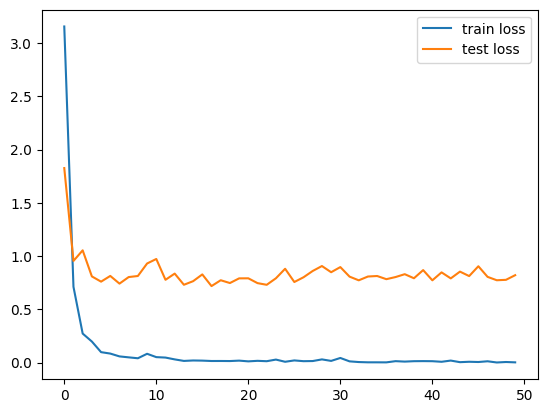

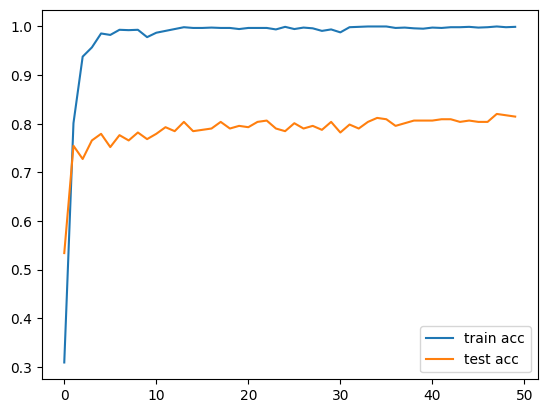

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(v.history['loss'], label='train loss')
plt.plot(v.history['val_loss'], label='test loss')
plt.legend()
plt.show()
plt.savefig('/content/drive/MyDrive/PAPER/vLossVal_loss_280323')

# plot the accuracy
plt.plot(v.history['accuracy'], label='train acc')
plt.plot(v.history['val_accuracy'], label='test acc')
plt.legend()
plt.show()
plt.savefig('/content/drive/MyDrive/PAPER/vAccVal_acc_280323')

In [ ]:
from tensorflow.keras.models import load_model
model=load_model('/content/drive/MyDrive/PAPER/model_vgg16_280223_sparse.h5')

In [ ]:
from sklearn.metrics import classification_report


In [ ]:
len(images)

222

In [ ]:
labels.shape

(222, 39)

In [ ]:
ypred = model.predict(images)
pred=np.argmax(ypred, axis=1)
ground = np.argmax(labels,axis=1)
print(classification_report(ground,pred))

7/7 [==============================] - 1s 139ms/step
              precision    recall  f1-score   support

           0       0.57      0.80      0.67         5
           1       0.83      1.00      0.91         5
           2       1.00      0.86      0.92         7
           3       0.83      0.83      0.83         6
           4       1.00      0.83      0.91         6
           5       0.83      1.00      0.91         5
           6       1.00      0.80      0.89         5
           7       0.60      0.50      0.55         6
           8       1.00      1.00      1.00         6
           9       1.00      1.00      1.00         6
          10       0.86      1.00      0.92         6
          11       0.57      0.80      0.67         5
          12       0.60      0.60      0.60         5
          13       1.00      0.83      0.91         6
          14       1.00      1.00      1.00         6
          15       1.00      1.00      1.00         5
          16       1.00     

In [ ]:
cr=classification_report(ground,pred, output_dict=True)
v6_cr = pd.DataFrame(cr).transpose()

In [ ]:
v6_rep=v6_cr.iloc[39:42,:]
v6_rep

,precision,recall,f1-score,support
accuracy,0.855856,0.855856,0.855856,0.855856
macro avg,0.875824,0.860073,0.853939,222.000000
weighted avg,0.880266,0.855856,0.853511,222.000000


In [ ]:
v6_cr=v6_cr.iloc[0:39,:]

In [ ]:
v6_cr['class']=li

In [ ]:
print(v6_cr)

    precision    recall  f1-score  support  class
0    0.571429  0.800000  0.666667      5.0      A
1    0.833333  1.000000  0.909091      5.0     AA
2    1.000000  0.857143  0.923077      7.0     BA
3    0.833333  0.833333  0.833333      6.0    BHA
4    1.000000  0.833333  0.909091      6.0     BI
5    0.833333  1.000000  0.909091      5.0    CHA
6    1.000000  0.800000  0.888889      5.0     DA
7    0.600000  0.500000  0.545455      6.0    DHA
8    1.000000  1.000000  1.000000      6.0    DHO
9    1.000000  1.000000  1.000000      6.0     DO
10   0.857143  1.000000  0.923077      6.0      E
11   0.571429  0.800000  0.666667      5.0     GA
12   0.600000  0.600000  0.600000      5.0    GHA
13   1.000000  0.833333  0.909091      6.0     HA
14   1.000000  1.000000  1.000000      6.0     JA
15   1.000000  1.000000  1.000000      5.0    JHA
16   1.000000  0.800000  0.888889      5.0     KA
17   0.800000  0.800000  0.800000      5.0    KHA
18   1.000000  0.666667  0.800000      6.0     LA


In [ ]:
from sklearn.metrics import precision_recall_fscore_support
res = []
for l in range(39):
    prec,recall,_,_ = precision_recall_fscore_support(np.array(ground)==l,
                                                      np.array(pred)==l,
                                                      pos_label=True,average=None)
    res.append([li[l],recall[0],recall[1]])

In [ ]:
specicifity=pd.DataFrame(res,columns = ['class','sensitivity','specificity'])

In [ ]:
print(specicifity)

    class  sensitivity  specificity
0       A     0.986175     0.800000
1      AA     0.995392     1.000000
2      BA     1.000000     0.857143
3     BHA     0.995370     0.833333
4      BI     1.000000     0.833333
5     CHA     0.995392     1.000000
6      DA     1.000000     0.800000
7     DHA     0.990741     0.500000
8     DHO     1.000000     1.000000
9      DO     1.000000     1.000000
10      E     0.995370     1.000000
11     GA     0.986175     0.800000
12    GHA     0.990783     0.600000
13     HA     1.000000     0.833333
14     JA     1.000000     1.000000
15    JHA     1.000000     1.000000
16     KA     1.000000     0.800000
17    KHA     0.995392     0.800000
18     LA     1.000000     0.666667
19     MA     0.995349     1.000000
20     NA     1.000000     0.428571
21      O     0.990741     0.833333
22     PA     0.990741     0.833333
23    PHA     1.000000     1.000000
24     RA     0.990698     0.857143
25    RHA     0.990783     1.000000
26     SA     1.000000     0

In [ ]:
v6_matrix=pd.merge(specicifity, v6_cr, on ='class')

In [ ]:
# result = pd.concat([specicifity,resnet_cr], axis=1,ignore_index=True )
v6_matrix

,class,sensitivity,specificity,precision,recall,f1-score,support
0,A,0.986175,0.800000,0.571429,0.800000,0.666667,5.0
1,AA,0.995392,1.000000,0.833333,1.000000,0.909091,5.0
2,BA,1.000000,0.857143,1.000000,0.857143,0.923077,7.0
3,BHA,0.995370,0.833333,0.833333,0.833333,0.833333,6.0
4,BI,1.000000,0.833333,1.000000,0.833333,0.909091,6.0
5,CHA,0.995392,1.000000,0.833333,1.000000,0.909091,5.0
6,DA,1.000000,0.800000,1.000000,0.800000,0.888889,5.0
7,DHA,0.990741,0.500000,0.600000,0.500000,0.545455,6.0
8,DHO,1.000000,1.000000,1.000000,1.000000,1.000000,6.0
9,DO,1.000000,1.000000,1.000000,1.000000,1.000000,6.0


In [ ]:
v6_matrix.to_csv('/content/drive/MyDrive/PAPER/vgg16_classification_report.csv')


In [ ]:
v6_rep.to_csv('/content/drive/MyDrive/PAPER/vgg16_acc_report.csv')

#Resnet50

In [ ]:
# Import the VGG16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet50 = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
# don't train existing weights
for layer in resnet50.layers:
    layer.trainable = False

In [ ]:
rx = Flatten()(resnet50.output)

In [ ]:
r_prediction = Dense(len(folders), activation='softmax')(rx)

# create a model object
r_model = Model(inputs=resnet50.input, outputs=r_prediction)

In [ ]:
# view the structure of the model
r_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [ ]:
# tell the model what cost and optimization method to use
# model.compile(
#   loss='categorical_crossentropy',
#   optimizer='adam',
#   metrics=['accuracy']
# )


r_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# checkpoint
from keras.callbacks import ModelCheckpoint,EarlyStopping,CSVLogger
# r_weightpath = "/content/drive/MyDrive/Thesis/weights/checkpoint/res_best_weights-{epoch:02d}-{val_accuracy:.2f}.hdf5"
r_weightpath = "/content/drive/MyDrive/PAPER/resnet50/res_best_weights.hdf5"
checkpoint = ModelCheckpoint(r_weightpath, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=True, mode='max')
# checkpoint = ModelCheckpoint(r_weightpath, monitor='val_accuracy', verbose=1, save_best_only=True,  mode='max')

early_stop=EarlyStopping(monitor='val_loss',patience=10,verbose=1)

log_csv=CSVLogger('/content/drive/MyDrive/PAPER/resnet50/logs.csv',separator=',',append=False)

callbacks_list = [checkpoint,early_stop,log_csv]

# fit the model
# Run the cell. It will take some time to execute
r = r_model.fit(
  training_set,
  validation_data=val_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(val_set),
  callbacks=callbacks_list
)
# save it as a h5 file
r_model.save('/content/drive/MyDrive/PAPER/resnet50/resnet.h5')

Epoch 1/50
42/42 [==============================] - ETA: 0s - loss: 16.8199 - accuracy: 0.0272
Epoch 1: val_accuracy improved from -inf to 0.04087, saving model to /content/drive/MyDrive/PAPER/resnet50/res_best_weights.hdf5
42/42 [==============================] - 34s 663ms/step - loss: 16.8199 - accuracy: 0.0272 - val_loss: 11.4342 - val_accuracy: 0.0409
Epoch 2/50
42/42 [==============================] - ETA: 0s - loss: 6.5756 - accuracy: 0.0869
Epoch 2: val_accuracy improved from 0.04087 to 0.16621, saving model to /content/drive/MyDrive/PAPER/resnet50/res_best_weights.hdf5
42/42 [==============================] - 29s 688ms/step - loss: 6.5756 - accuracy: 0.0869 - val_loss: 4.6294 - val_accuracy: 0.1662
Epoch 3/50
42/42 [==============================] - ETA: 0s - loss: 4.2827 - accuracy: 0.1451
Epoch 3: val_accuracy did not improve from 0.16621
42/42 [==============================] - 27s 644ms/step - loss: 4.2827 - accuracy: 0.1451 - val_loss: 4.4918 - val_accuracy: 0.1008
Epoch 4

In [ ]:
import matplotlib.pyplot as plt

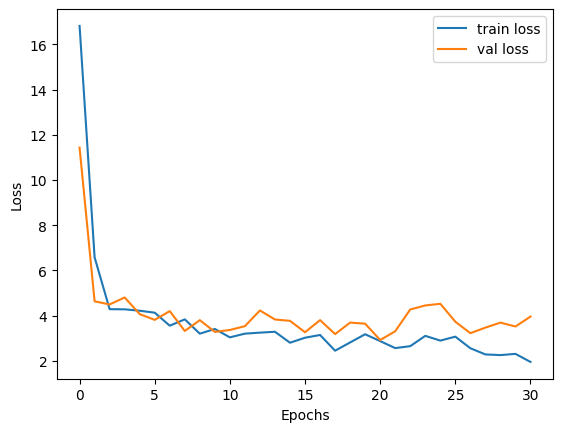

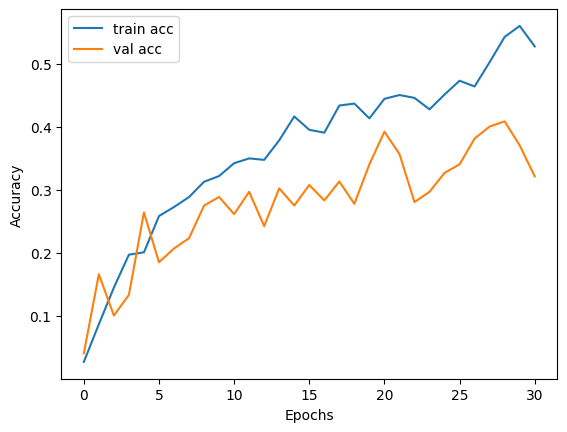

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.savefig('/content/drive/MyDrive/Thesis/model/resnet50/LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt.savefig('/content/drive/MyDrive/Thesis/model/resnet50/AccVal_acc')

In [ ]:
labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
model=load_model('/content/drive/MyDrive/PAPER/resnet50/resnet.h5')

In [ ]:
from sklearn.metrics import classification_report


In [ ]:
ypred = model.predict(images)
pred=np.argmax(ypred, axis=1)
ground = np.argmax(labels,axis=1)
print(classification_report(ground,pred))

7/7 [==============================] - 3s 285ms/step
              precision    recall  f1-score   support

           0       0.10      1.00      0.19         5
           1       0.20      1.00      0.33         5
           2       1.00      0.43      0.60         7
           3       1.00      0.17      0.29         6
           4       0.60      0.50      0.55         6
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00         5
           7       0.00      0.00      0.00         6
           8       0.00      0.00      0.00         6
           9       0.00      0.00      0.00         6
          10       1.00      0.17      0.29         6
          11       1.00      0.20      0.33         5
          12       0.00      0.00      0.00         5
          13       1.00      0.17      0.29         6
          14       0.50      0.67      0.57         6
          15       1.00      0.20      0.33         5
          16       1.00     

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
cr=classification_report(ground,pred, output_dict=True)
resnet_cr = pd.DataFrame(cr).transpose()

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
resnet_rep=resnet_cr.iloc[39:42,:]
resnet_rep

,precision,recall,f1-score,support
accuracy,0.319820,0.319820,0.319820,0.31982
macro avg,0.502189,0.333028,0.297602,222.00000
weighted avg,0.494009,0.319820,0.290646,222.00000


In [ ]:
resnet_cr=resnet_cr.iloc[0:39,:]

In [ ]:
resnet_cr['class']=li

In [ ]:
print(resnet_cr)

    precision    recall  f1-score  support  class
0    0.104167  1.000000  0.188679      5.0      A
1    0.200000  1.000000  0.333333      5.0     AA
2    1.000000  0.428571  0.600000      7.0     BA
3    1.000000  0.166667  0.285714      6.0    BHA
4    0.600000  0.500000  0.545455      6.0     BI
5    0.000000  0.000000  0.000000      5.0    CHA
6    0.000000  0.000000  0.000000      5.0     DA
7    0.000000  0.000000  0.000000      6.0    DHA
8    0.000000  0.000000  0.000000      6.0    DHO
9    0.000000  0.000000  0.000000      6.0     DO
10   1.000000  0.166667  0.285714      6.0      E
11   1.000000  0.200000  0.333333      5.0     GA
12   0.000000  0.000000  0.000000      5.0    GHA
13   1.000000  0.166667  0.285714      6.0     HA
14   0.500000  0.666667  0.571429      6.0     JA
15   1.000000  0.200000  0.333333      5.0    JHA
16   1.000000  0.200000  0.333333      5.0     KA
17   0.210526  0.800000  0.333333      5.0    KHA
18   0.500000  0.333333  0.400000      6.0     LA


In [ ]:
from sklearn.metrics import precision_recall_fscore_support
res = []
for l in range(39):
    prec,recall,_,_ = precision_recall_fscore_support(np.array(ground)==l,
                                                      np.array(pred)==l,
                                                      pos_label=True,average=None)
    res.append([li[l],recall[0],recall[1]])

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classificat

In [ ]:
import pandas as pd

In [ ]:
specicifity=pd.DataFrame(res,columns = ['class','sensitivity','specificity'])

In [ ]:
print(specicifity)

    class  sensitivity  specificity
0       A     0.801843     1.000000
1      AA     0.907834     1.000000
2      BA     1.000000     0.428571
3     BHA     1.000000     0.166667
4      BI     0.990741     0.500000
5     CHA     1.000000     0.000000
6      DA     1.000000     0.000000
7     DHA     1.000000     0.000000
8     DHO     1.000000     0.000000
9      DO     1.000000     0.000000
10      E     1.000000     0.166667
11     GA     1.000000     0.200000
12    GHA     0.990783     0.000000
13     HA     1.000000     0.166667
14     JA     0.981481     0.666667
15    JHA     1.000000     0.200000
16     KA     1.000000     0.200000
17    KHA     0.930876     0.800000
18     LA     0.990741     0.333333
19     MA     0.976744     0.142857
20     NA     1.000000     0.000000
21      O     0.990741     0.166667
22     PA     0.953704     0.500000
23    PHA     0.925926     0.833333
24     RA     1.000000     0.000000
25    RHA     1.000000     0.400000
26     SA     1.000000     0

In [ ]:
resnet_matrix=pd.merge(specicifity, resnet_cr, on ='class')

In [ ]:
# result = pd.concat([specicifity,resnet_cr], axis=1,ignore_index=True )
resnet_matrix

,class,sensitivity,specificity,precision,recall,f1-score,support
0,A,0.801843,1.000000,0.104167,1.000000,0.188679,5.0
1,AA,0.907834,1.000000,0.200000,1.000000,0.333333,5.0
2,BA,1.000000,0.428571,1.000000,0.428571,0.600000,7.0
3,BHA,1.000000,0.166667,1.000000,0.166667,0.285714,6.0
4,BI,0.990741,0.500000,0.600000,0.500000,0.545455,6.0
5,CHA,1.000000,0.000000,0.000000,0.000000,0.000000,5.0
6,DA,1.000000,0.000000,0.000000,0.000000,0.000000,5.0
7,DHA,1.000000,0.000000,0.000000,0.000000,0.000000,6.0
8,DHO,1.000000,0.000000,0.000000,0.000000,0.000000,6.0
9,DO,1.000000,0.000000,0.000000,0.000000,0.000000,6.0


In [ ]:
resnet_matrix.to_csv('/content/drive/MyDrive/PAPER/resnet50/classification_report.csv')


In [ ]:
resnet_rep.to_csv('/content/drive/MyDrive/PAPER/resnet50/acc_report.csv')

#VGG19


In [ ]:
# Import the VGG16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

80134624/80134624 [==============================] - 1s 0us/step


In [ ]:
# don't train existing weights
for layer in vgg19.layers:
    layer.trainable = False

In [ ]:
v9x = Flatten()(vgg19.output)

In [ ]:
v9_prediction = Dense(len(folders), activation='softmax')(v9x)

# create a model object
v9_model = Model(inputs=vgg19.input, outputs=v9_prediction)

In [ ]:
# view the structure of the model
v9_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
# tell the model what cost and optimization method to use
v9_model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# checkpoint
from keras.callbacks import ModelCheckpoint,EarlyStopping,CSVLogger
# r_weightpath = "/content/drive/MyDrive/Thesis/weights/checkpoint/res_best_weights-{epoch:02d}-{val_accuracy:.2f}.hdf5"
v9_weightpath = "/content/drive/MyDrive/PAPER/VGG19/v19_best_weights.hdf5"
checkpoint = ModelCheckpoint(v9_weightpath, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=True, mode='max')
# checkpoint = ModelCheckpoint(r_weightpath, monitor='val_accuracy', verbose=1, save_best_only=True,  mode='max')

early_stop=EarlyStopping(monitor='val_loss',patience=10,verbose=1)

log_csv=CSVLogger('/content/drive/MyDrive/PAPER/VGG19/v19_logs.csv',separator=',',append=False)

callbacks_list = [checkpoint,early_stop,log_csv]

# fit the model
# Run the cell. It will take some time to execute
v9 = v9_model.fit(
  training_set,
  validation_data=val_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(val_set),
  callbacks=callbacks_list
)

v9_model.save('/content/drive/MyDrive/PAPER/VGG19/model_vgg19.h5')

Epoch 1/20
42/42 [==============================] - ETA: 0s - loss: 3.6674 - accuracy: 0.2600
Epoch 1: val_accuracy improved from -inf to 0.47411, saving model to /content/drive/MyDrive/PAPER/VGG19/v19_best_weights.hdf5
42/42 [==============================] - 29s 657ms/step - loss: 3.6674 - accuracy: 0.2600 - val_loss: 2.0357 - val_accuracy: 0.4741
Epoch 2/20
42/42 [==============================] - ETA: 0s - loss: 0.9156 - accuracy: 0.7468
Epoch 2: val_accuracy improved from 0.47411 to 0.64033, saving model to /content/drive/MyDrive/PAPER/VGG19/v19_best_weights.hdf5
42/42 [==============================] - 30s 706ms/step - loss: 0.9156 - accuracy: 0.7468 - val_loss: 1.2218 - val_accuracy: 0.6403
Epoch 3/20
42/42 [==============================] - ETA: 0s - loss: 0.4683 - accuracy: 0.8844
Epoch 3: val_accuracy improved from 0.64033 to 0.70027, saving model to /content/drive/MyDrive/PAPER/VGG19/v19_best_weights.hdf5
42/42 [==============================] - 28s 655ms/step - loss: 0.4683

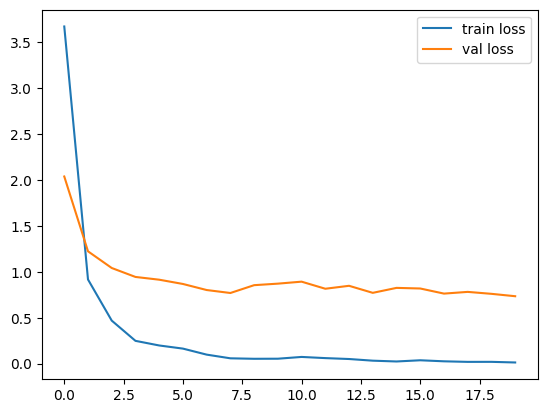

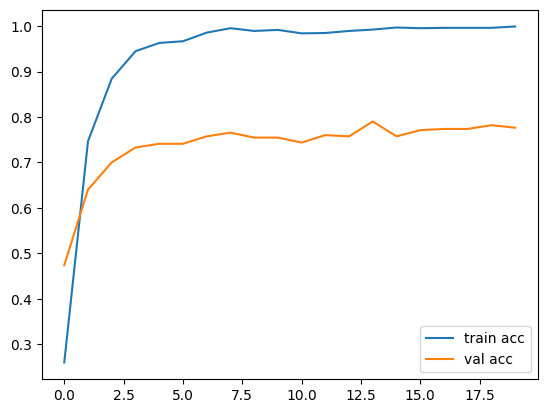

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(v9.history['loss'], label='train loss')
plt.plot(v9.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('/content/drive/MyDrive/Thesis/model/vgg19/vLossVal_loss')

# plot the accuracy
plt.plot(v9.history['accuracy'], label='train acc')
plt.plot(v9.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('/content/drive/MyDrive/Thesis/model/vgg19/vAccVal_acc')

In [ ]:
from tensorflow.keras.models import load_model
model=load_model('/content/drive/MyDrive/PAPER/VGG19/model_vgg19.h5')

In [ ]:
from sklearn.metrics import classification_report


In [ ]:
ypred = model.predict(images)
pred=np.argmax(ypred, axis=1)
ground = np.argmax(labels,axis=1)
print(classification_report(ground,pred))

7/7 [==============================] - 1s 161ms/step
              precision    recall  f1-score   support

           0       0.50      0.80      0.62         5
           1       1.00      1.00      1.00         5
           2       0.86      0.86      0.86         7
           3       0.83      0.83      0.83         6
           4       1.00      0.83      0.91         6
           5       0.83      1.00      0.91         5
           6       1.00      0.80      0.89         5
           7       0.60      0.50      0.55         6
           8       1.00      1.00      1.00         6
           9       1.00      1.00      1.00         6
          10       0.86      1.00      0.92         6
          11       0.67      0.80      0.73         5
          12       0.75      0.60      0.67         5
          13       1.00      1.00      1.00         6
          14       1.00      1.00      1.00         6
          15       1.00      1.00      1.00         5
          16       1.00     

In [ ]:
cr=classification_report(ground,pred, output_dict=True)
v9_cr = pd.DataFrame(cr).transpose()

In [ ]:
v9_rep=v9_cr.iloc[39:42,:]
v9_rep

,precision,recall,f1-score,support
accuracy,0.833333,0.833333,0.833333,0.833333
macro avg,0.851679,0.837241,0.836275,222.000000
weighted avg,0.848718,0.833333,0.833012,222.000000


In [ ]:
v9_cr=v9_cr.iloc[0:39,:]

In [ ]:
v9_cr['class']=li

In [ ]:
print(v9_cr)

    precision    recall  f1-score  support  class
0    0.500000  0.800000  0.615385      5.0      A
1    1.000000  1.000000  1.000000      5.0     AA
2    0.857143  0.857143  0.857143      7.0     BA
3    0.833333  0.833333  0.833333      6.0    BHA
4    1.000000  0.833333  0.909091      6.0     BI
5    0.833333  1.000000  0.909091      5.0    CHA
6    1.000000  0.800000  0.888889      5.0     DA
7    0.600000  0.500000  0.545455      6.0    DHA
8    1.000000  1.000000  1.000000      6.0    DHO
9    1.000000  1.000000  1.000000      6.0     DO
10   0.857143  1.000000  0.923077      6.0      E
11   0.666667  0.800000  0.727273      5.0     GA
12   0.750000  0.600000  0.666667      5.0    GHA
13   1.000000  1.000000  1.000000      6.0     HA
14   1.000000  1.000000  1.000000      6.0     JA
15   1.000000  1.000000  1.000000      5.0    JHA
16   1.000000  0.800000  0.888889      5.0     KA
17   1.000000  0.800000  0.888889      5.0    KHA
18   1.000000  0.666667  0.800000      6.0     LA


In [ ]:
from sklearn.metrics import precision_recall_fscore_support
res = []
for l in range(39):
    prec,recall,_,_ = precision_recall_fscore_support(np.array(ground)==l,
                                                      np.array(pred)==l,
                                                      pos_label=True,average=None)
    res.append([li[l],recall[0],recall[1]])

In [ ]:
specicifity=pd.DataFrame(res,columns = ['class','sensitivity','specificity'])

In [ ]:
print(specicifity)

    class  sensitivity  specificity
0       A     0.981567     0.800000
1      AA     1.000000     1.000000
2      BA     0.995349     0.857143
3     BHA     0.995370     0.833333
4      BI     1.000000     0.833333
5     CHA     0.995392     1.000000
6      DA     1.000000     0.800000
7     DHA     0.990741     0.500000
8     DHO     1.000000     1.000000
9      DO     1.000000     1.000000
10      E     0.995370     1.000000
11     GA     0.990783     0.800000
12    GHA     0.995392     0.600000
13     HA     1.000000     1.000000
14     JA     1.000000     1.000000
15    JHA     1.000000     1.000000
16     KA     1.000000     0.800000
17    KHA     1.000000     0.800000
18     LA     1.000000     0.666667
19     MA     0.995349     0.857143
20     NA     0.990698     0.857143
21      O     0.990741     0.666667
22     PA     0.995370     0.833333
23    PHA     1.000000     1.000000
24     RA     0.995349     0.714286
25    RHA     0.995392     0.800000
26     SA     0.990741     0

In [ ]:
v9_matrix=pd.merge(specicifity, v9_cr, on ='class')

In [ ]:
# result = pd.concat([specicifity,resnet_cr], axis=1,ignore_index=True )
v9_matrix

,class,sensitivity,specificity,precision,recall,f1-score,support
0,A,0.981567,0.800000,0.500000,0.800000,0.615385,5.0
1,AA,1.000000,1.000000,1.000000,1.000000,1.000000,5.0
2,BA,0.995349,0.857143,0.857143,0.857143,0.857143,7.0
3,BHA,0.995370,0.833333,0.833333,0.833333,0.833333,6.0
4,BI,1.000000,0.833333,1.000000,0.833333,0.909091,6.0
5,CHA,0.995392,1.000000,0.833333,1.000000,0.909091,5.0
6,DA,1.000000,0.800000,1.000000,0.800000,0.888889,5.0
7,DHA,0.990741,0.500000,0.600000,0.500000,0.545455,6.0
8,DHO,1.000000,1.000000,1.000000,1.000000,1.000000,6.0
9,DO,1.000000,1.000000,1.000000,1.000000,1.000000,6.0


In [ ]:
v9_matrix.to_csv('/content/drive/MyDrive/Thesis/model/vgg19/classification_report.csv')


In [ ]:
v9_rep.to_csv('/content/drive/MyDrive/Thesis/model/vgg19/acc_report.csv')


#**Alexnet**

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2)

val_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (227, 227),
                                                 batch_size = 80,
                                                 class_mode = 'categorical')

Found 1323 images belonging to 39 classes.


In [ ]:
len(training_set)

17

In [ ]:
val_set = val_datagen.flow_from_directory(valid_path,
                                            target_size = (227, 227),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 367 images belonging to 39 classes.


In [ ]:
len(val_set)

12

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)


In [ ]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (227, 227),
                                            batch_size = 222,
                                            class_mode = 'categorical')
images, labels = next(test_set)
print(images.shape)
print(labels.shape)
type(images)

Found 222 images belonging to 39 classes.
(222, 227, 227, 3)
(222, 39)


numpy.ndarray

In [ ]:
# Initializing the CNN
classifier = Sequential()

# Convolution Step 1
classifier.add(Convolution2D(96, 11, strides = (4, 4), padding = 'valid', input_shape=(227, 227, 3), activation = 'relu'))

# Max Pooling Step 1
classifier.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))
classifier.add(BatchNormalization())

# Convolution Step 2
classifier.add(Convolution2D(256, 11, strides = (1, 1), padding='valid', activation = 'relu'))

# Max Pooling Step 2
classifier.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding='valid'))
classifier.add(BatchNormalization())

# Convolution Step 3
classifier.add(Convolution2D(384, 3, strides = (1, 1), padding='valid', activation = 'relu'))
classifier.add(BatchNormalization())

# Convolution Step 4
classifier.add(Convolution2D(384, 3, strides = (1, 1), padding='valid', activation = 'relu'))
classifier.add(BatchNormalization())

# Convolution Step 5
classifier.add(Convolution2D(256, 3, strides=(1,1), padding='valid', activation = 'relu'))

# Max Pooling Step 3
classifier.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))
classifier.add(BatchNormalization())

# Flattening Step
classifier.add(Flatten())

# Full Connection Step
classifier.add(Dense(units = 4096, activation = 'relu'))
classifier.add(Dropout(0.4))
classifier.add(BatchNormalization())
classifier.add(Dense(units = 4096, activation = 'relu'))
classifier.add(Dropout(0.4))
classifier.add(BatchNormalization())
classifier.add(Dense(units = 1000, activation = 'relu'))
classifier.add(Dropout(0.2))
classifier.add(BatchNormalization())
classifier.add(Dense(units = 39, activation = 'softmax'))
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 27, 27, 96)       384       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 17, 17, 256)       2973952   
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 256)        0         
 2D)                                                             
                                                        

**Loading Weights To The Model**

In [ ]:
# classifier.load_weights('/content/drive/MyDrive/Thesis/model_weights/model_vgg16_5pm_3.h5')

**Fine Tuning By Freezing Some Layers Of Our Model**

In [ ]:
# let's visualize layer names and layer indices to see how many layers
# we should freeze:
from keras import layers
for i, layer in enumerate(classifier.layers):
   print(i, layer.name)

0 conv2d
1 max_pooling2d
2 batch_normalization
3 conv2d_1
4 max_pooling2d_1
5 batch_normalization_1
6 conv2d_2
7 batch_normalization_2
8 conv2d_3
9 batch_normalization_3
10 conv2d_4
11 max_pooling2d_2
12 batch_normalization_4
13 flatten_3
14 dense_3
15 dropout
16 batch_normalization_5
17 dense_4
18 dropout_1
19 batch_normalization_6
20 dense_5
21 dropout_2
22 batch_normalization_7
23 dense_6


In [ ]:
# we chose to train the top 2 conv blocks, i.e. we will freeze
# the first 8 layers and unfreeze the rest:
print("Freezed layers:")
for i, layer in enumerate(classifier.layers[:20]):
    print(i, layer.name)
    layer.trainable = True


Freezed layers:
0 conv2d
1 max_pooling2d
2 batch_normalization
3 conv2d_1
4 max_pooling2d_1
5 batch_normalization_1
6 conv2d_2
7 batch_normalization_2
8 conv2d_3
9 batch_normalization_3
10 conv2d_4
11 max_pooling2d_2
12 batch_normalization_4
13 flatten_3
14 dense_3
15 dropout
16 batch_normalization_5
17 dense_4
18 dropout_1
19 batch_normalization_6


**Model Summary After Freezing**

In [ ]:
#trainable parameters decrease after freezing some bottom layers   
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 27, 27, 96)       384       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 17, 17, 256)       2973952   
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 256)        0         
 2D)                                                             
                                                        

**Compiling the Model**

In [ ]:
# from tensorflow.keras.optimizers.optimizer_v2 import adam
# Compiling the Model
from tensorflow.keras import optimizers
classifier.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# checkpoint
from keras.callbacks import ModelCheckpoint,EarlyStopping,CSVLogger
# r_weightpath = "/content/drive/MyDrive/Thesis/weights/checkpoint/res_best_weights-{epoch:02d}-{val_accuracy:.2f}.hdf5"
v9_weightpath = "/content/drive/MyDrive/PAPER/alex/alex_best_weights.hdf5"
checkpoint = ModelCheckpoint(v9_weightpath, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=True, mode='max')
# checkpoint = ModelCheckpoint(r_weightpath, monitor='val_accuracy', verbose=1, save_best_only=True,  mode='max')

early_stop=EarlyStopping(monitor='val_loss',patience=10,verbose=1)

log_csv=CSVLogger('/content/drive/MyDrive/PAPER/alex/alex_logs.csv',separator=',',append=False)

callbacks_list = [checkpoint,early_stop,log_csv]

#fitting images to CNN
history = classifier.fit_generator(training_set,
                         steps_per_epoch=len(training_set),
                         validation_data=val_set,
                         epochs=50,
                         validation_steps=len(val_set),
                         callbacks=callbacks_list)
#saving model
filepath="/content/drive/MyDrive/PAPER/alex/AlexNetModel.h5"
classifier.save(filepath)

<ipython-input-146-71d45806fa7e>:15: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = classifier.fit_generator(training_set,


Epoch 1/50
17/17 [==============================] - ETA: 0s - loss: 4.1089 - accuracy: 0.0937
Epoch 1: val_accuracy improved from -inf to 0.02725, saving model to /content/drive/MyDrive/PAPER/alex/alex_best_weights.hdf5
17/17 [==============================] - 38s 2s/step - loss: 4.1089 - accuracy: 0.0937 - val_loss: 130.0572 - val_accuracy: 0.0272
Epoch 2/50
17/17 [==============================] - ETA: 0s - loss: 3.1448 - accuracy: 0.2116
Epoch 2: val_accuracy improved from 0.02725 to 0.02997, saving model to /content/drive/MyDrive/PAPER/alex/alex_best_weights.hdf5
17/17 [==============================] - 28s 2s/step - loss: 3.1448 - accuracy: 0.2116 - val_loss: 112.1887 - val_accuracy: 0.0300
Epoch 3/50
17/17 [==============================] - ETA: 0s - loss: 2.5187 - accuracy: 0.3122
Epoch 3: val_accuracy did not improve from 0.02997
17/17 [==============================] - 26s 2s/step - loss: 2.5187 - accuracy: 0.3122 - val_loss: 46.7428 - val_accuracy: 0.0300
Epoch 4/50
17/17 [==

**Visualising Training Progress**

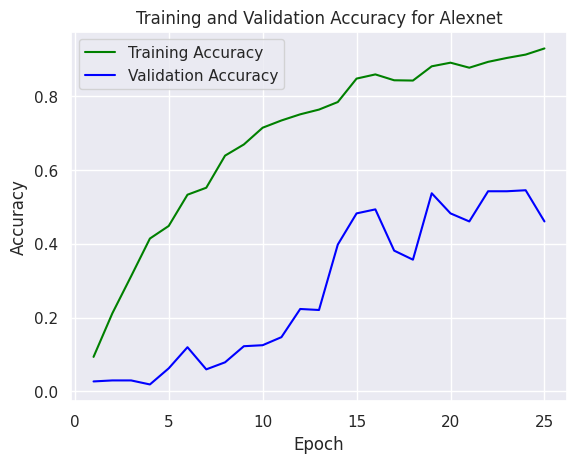

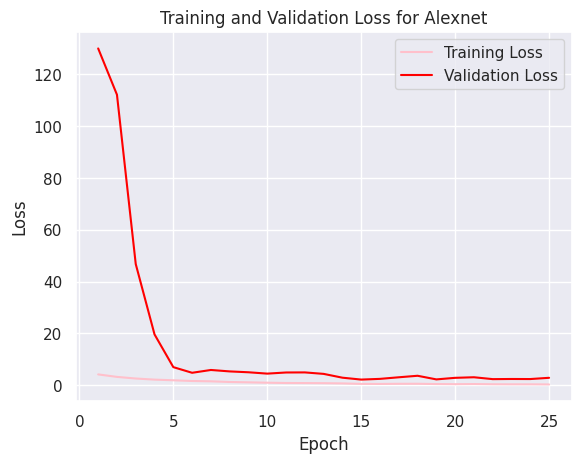

In [ ]:
#plotting training values
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy for Alexnet')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss for Alexnet')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model=load_model("/content/drive/MyDrive/PAPER/alex/AlexNetModel.h5")

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
import numpy as np

In [ ]:
len(ground)

222

In [ ]:
ypred = model.predict(images)
pred=np.argmax(ypred, axis=1)
ground = np.argmax(labels,axis=1)
print(classification_report(ground,pred))

7/7 [==============================] - 1s 91ms/step
              precision    recall  f1-score   support

           0       0.50      0.40      0.44         5
           1       0.50      0.60      0.55         5
           2       1.00      0.29      0.44         7
           3       0.30      0.50      0.37         6
           4       0.42      0.83      0.56         6
           5       0.40      0.40      0.40         5
           6       0.33      0.80      0.47         5
           7       0.67      0.67      0.67         6
           8       0.67      0.33      0.44         6
           9       0.71      0.83      0.77         6
          10       1.00      0.50      0.67         6
          11       0.33      0.80      0.47         5
          12       0.50      0.20      0.29         5
          13       1.00      0.33      0.50         6
          14       0.12      0.50      0.20         6
          15       0.50      0.80      0.62         5
          16       0.62      

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
cr=classification_report(ground,pred, output_dict=True)
a_cr = pd.DataFrame(cr).transpose()

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
a_rep=a_cr.iloc[39:42,:]
a_rep

,precision,recall,f1-score,support
accuracy,0.463964,0.463964,0.463964,0.463964
macro avg,0.572924,0.474908,0.462355,222.000000
weighted avg,0.585221,0.463964,0.459408,222.000000


In [ ]:
a_cr=a_cr.iloc[0:39,:]

In [ ]:
a_cr['class']=li

In [ ]:
print(a_cr)

    precision    recall  f1-score  support  class
0    0.500000  0.400000  0.444444      5.0      A
1    0.500000  0.600000  0.545455      5.0     AA
2    1.000000  0.285714  0.444444      7.0     BA
3    0.300000  0.500000  0.375000      6.0    BHA
4    0.416667  0.833333  0.555556      6.0     BI
5    0.400000  0.400000  0.400000      5.0    CHA
6    0.333333  0.800000  0.470588      5.0     DA
7    0.666667  0.666667  0.666667      6.0    DHA
8    0.666667  0.333333  0.444444      6.0    DHO
9    0.714286  0.833333  0.769231      6.0     DO
10   1.000000  0.500000  0.666667      6.0      E
11   0.333333  0.800000  0.470588      5.0     GA
12   0.500000  0.200000  0.285714      5.0    GHA
13   1.000000  0.333333  0.500000      6.0     HA
14   0.125000  0.500000  0.200000      6.0     JA
15   0.500000  0.800000  0.615385      5.0    JHA
16   0.625000  1.000000  0.769231      5.0     KA
17   0.300000  0.600000  0.400000      5.0    KHA
18   1.000000  0.166667  0.285714      6.0     LA


In [ ]:
from sklearn.metrics import precision_recall_fscore_support
res = []
for l in range(39):
    prec,recall,_,_ = precision_recall_fscore_support(np.array(ground)==l,
                                                      np.array(pred)==l,
                                                      pos_label=True,average=None)
    res.append([li[l],recall[0],recall[1]])

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
specicifity=pd.DataFrame(res,columns = ['class','sensitivity','specificity'])

In [ ]:
print(specicifity)

    class  sensitivity  specificity
0       A     0.990783     0.400000
1      AA     0.986175     0.600000
2      BA     1.000000     0.285714
3     BHA     0.967593     0.500000
4      BI     0.967593     0.833333
5     CHA     0.986175     0.400000
6      DA     0.963134     0.800000
7     DHA     0.990741     0.666667
8     DHO     0.995370     0.333333
9      DO     0.990741     0.833333
10      E     1.000000     0.500000
11     GA     0.963134     0.800000
12    GHA     0.995392     0.200000
13     HA     1.000000     0.333333
14     JA     0.902778     0.500000
15    JHA     0.981567     0.800000
16     KA     0.986175     1.000000
17    KHA     0.967742     0.600000
18     LA     1.000000     0.166667
19     MA     1.000000     0.285714
20     NA     0.986047     0.571429
21      O     0.995370     0.166667
22     PA     1.000000     0.000000
23    PHA     1.000000     0.833333
24     RA     1.000000     0.428571
25    RHA     0.976959     0.600000
26     SA     1.000000     0

In [ ]:
a_matrix=pd.merge(specicifity, a_cr, on ='class')

In [ ]:
# result = pd.concat([specicifity,resnet_cr], axis=1,ignore_index=True )
a_matrix

,class,sensitivity,specificity,precision,recall,f1-score,support
0,A,0.990783,0.400000,0.500000,0.400000,0.444444,5.0
1,AA,0.986175,0.600000,0.500000,0.600000,0.545455,5.0
2,BA,1.000000,0.285714,1.000000,0.285714,0.444444,7.0
3,BHA,0.967593,0.500000,0.300000,0.500000,0.375000,6.0
4,BI,0.967593,0.833333,0.416667,0.833333,0.555556,6.0
5,CHA,0.986175,0.400000,0.400000,0.400000,0.400000,5.0
6,DA,0.963134,0.800000,0.333333,0.800000,0.470588,5.0
7,DHA,0.990741,0.666667,0.666667,0.666667,0.666667,6.0
8,DHO,0.995370,0.333333,0.666667,0.333333,0.444444,6.0
9,DO,0.990741,0.833333,0.714286,0.833333,0.769231,6.0


In [ ]:
a_matrix.to_csv('/content/drive/MyDrive/PAPER/alex/classification_report.csv')


In [ ]:
a_rep.to_csv('/content/drive/MyDrive/PAPER/alex/acc_report.csv')

#**Predicting New Test Image(s)**

In [ ]:
# predicting an image
from keras.preprocessing import image
import numpy as np
image_path = "../input/new-plant-diseases-dataset/test/test/TomatoEarlyBlight1.JPG"
new_img = image.load_img(image_path, target_size=(224, 224))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
img = img/255

print("Following is our prediction:")
prediction = classifier.predict(img)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
d = prediction.flatten()
j = d.max()
for index,item in enumerate(d):
    if item == j:
        class_name = li[index]

##Another way
# img_class = classifier.predict_classes(img)
# img_prob = classifier.predict_proba(img)
# print(img_class ,img_prob )


#ploting image with predicted class name        
plt.figure(figsize = (4,4))
plt.imshow(new_img)
plt.axis('off')
plt.title(class_name)
plt.show()

#Overall

In [ ]:
res = pd.read_csv('/content/drive/MyDrive/PAPER/resnet50/logs.csv')
v6= pd.read_csv('/content/drive/MyDrive/PAPER/v16_logs_280223_sparse.csv')
v9=pd.read_csv('/content/drive/MyDrive/PAPER/VGG19/v19_logs.csv')
al=pd.read_csv('/content/drive/MyDrive/PAPER/alex/alex_logs.csv')

In [ ]:
res = res.iloc[:20,:]

ValueError: ignored

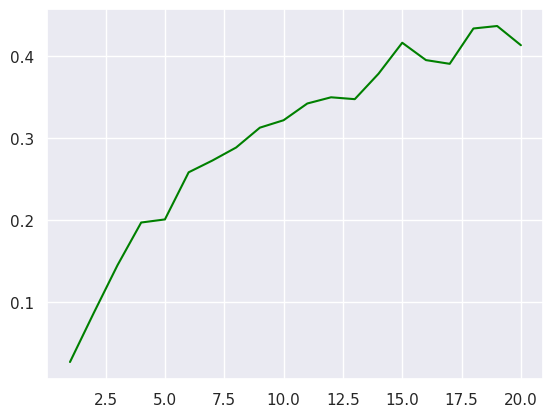

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = res['accuracy']
# val_acc = history.history['val_accuracy']
# loss = history.history['loss']
# val_loss = history.history['val_loss']
epochs = range(1, len(res['loss']) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='ResNet')
plt.plot(epochs, v6['accuracy'], color='red', label='VGG16')
plt.plot(epochs, v9['accuracy'], color='blue', label='VGG19')
plt.plot(epochs, al['accuracy'], color='purple', label='AlexNet')
# plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training Accuracy Comparision')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# plt.figure()
# #loss plot
# plt.plot(epochs, loss, color='pink', label='Training Loss')
# plt.plot(epochs, val_loss, color='red', label='Validation Loss')
# plt.title('Training and Validation Loss for Alexnet')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()

plt.show()

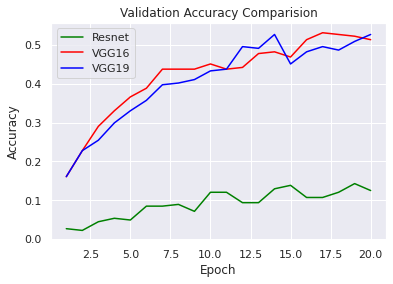

In [ ]:
# acc = res['accuracy']
# val_acc = history.history['val_accuracy']
# loss = history.history['loss']
# val_loss = history.history['val_loss']
epochs = range(1, len(res['loss']) + 1)

#accuracy plot
plt.plot(epochs, res['val_accuracy'], color='green', label='Resnet')
plt.plot(epochs, v6['val_accuracy'], color='red', label='VGG16')
plt.plot(epochs, v9['val_accuracy'], color='blue', label='VGG19')
# plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Validation Accuracy Comparision')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# plt.figure()
# #loss plot
# plt.plot(epochs, loss, color='pink', label='Training Loss')
# plt.plot(epochs, val_loss, color='red', label='Validation Loss')
# plt.title('Training and Validation Loss for Alexnet')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()

plt.show()

In [ ]:
ra=pd.read_csv('/content/drive/MyDrive/Thesis/model/resnet50/acc_report.csv')
v6a=pd.read_csv('/content/drive/MyDrive/Thesis/model/vgg16/acc_report.csv')
v9a=pd.read_csv('/content/drive/MyDrive/Thesis/model/vgg19/acc_report.csv')

In [ ]:
ra=ra.transpose()
v6a=v6a
v9a=v9a

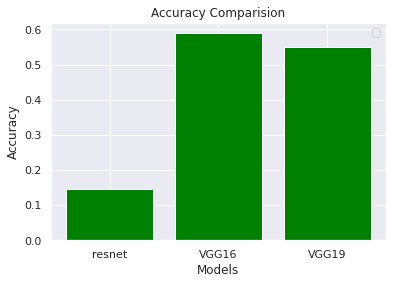

In [ ]:

y=np.array([ra['f1-score'].iat[0],v6a['f1-score'].iat[0],v9a['f1-score'].iat[0]])
x=np.array(['resnet','VGG16','VGG19'])

plt.bar(x,y,color = "green")

plt.title('Accuracy Comparision')
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.legend()


plt.show()

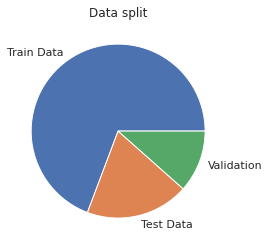

In [ ]:
y = np.array([1343, 372, 224])
labels = ["Train Data", "Test Data", "Validation"]
plt.pie(y,labels=labels)
plt.title('Data split')
plt.show() 

In [ ]:
ra

,Unnamed: 0,precision,recall,f1-score,support
0,accuracy,0.147321,0.147321,0.147321,0.147321
1,macro avg,0.178839,0.144119,0.120518,224.000000
2,weighted avg,0.184569,0.147321,0.120974,224.000000
